In [1]:
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
import xgboost as xgb
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/NCCO2R/NC-Final.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape 

(477, 19)

In [3]:
X = pd.read_excel(AA, usecols='A:P') 
Y=pd.read_excel(AA, usecols='R')


In [4]:
import seaborn as sns

In [6]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y.values.ravel(), test_size=0.2, random_state=22)

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale target if it's not already normalized
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Define the SVM model
svm_model = SVR()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'C': [0.1, 1, 10, 100],                         # Regularization parameter
    'gamma': ['scale', 'auto'],                     # Kernel coefficient
    'degree': [2, 3, 4]                             # Degree for the polynomial kernel
}

# Create GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv=10, n_jobs=-1, verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train_scaled)

# Retrieve the best model and parameters
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Evaluate performance on the training set with the best model
y_train_pred_scaled_best = best_model.predict(X_train_scaled)

# Reshape predictions for inverse transform
y_train_pred_best = scaler_y.inverse_transform(y_train_pred_scaled_best.reshape(-1, 1)).ravel()

train_rmse_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
train_r2_best = r2_score(y_train, y_train_pred_best)
print("Training RMSE:", train_rmse_best)
print("Training R^2:", train_r2_best)

# Evaluate performance on the test set with the best model
y_test_pred_scaled_best = best_model.predict(X_test_scaled)

# Reshape predictions for inverse transform
y_test_pred_best = scaler_y.inverse_transform(y_test_pred_scaled_best.reshape(-1, 1)).ravel()

test_rmse_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
test_r2_best = r2_score(y_test, y_test_pred_best)
print("Test RMSE:", test_rmse_best)
print("Test R^2:", test_r2_best)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best parameters found:  {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Training RMSE: 8.171573220709703
Training R^2: 0.9023454294980715
Test RMSE: 8.947026149703918
Test R^2: 0.8707485193720628


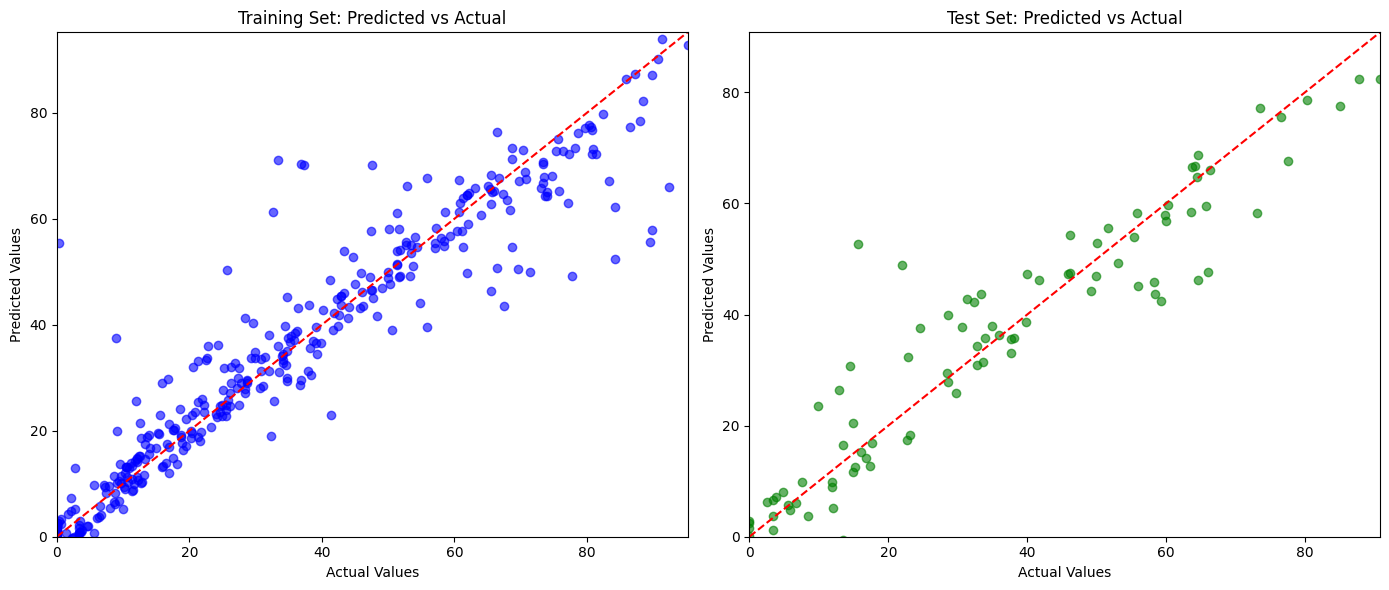

In [7]:
# Scatter plot for training set predictions
plt.figure(figsize=(14, 6))

# Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_best, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Training Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_train.min(), y_train.max()])
plt.ylim([y_train.min(), y_train.max()])

# Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_best, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Test Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])

plt.tight_layout()
plt.show()